In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("data/yelp_cats_boston.csv") as f:
    bos_df = pd.read_csv(f)
with open("data/Yelp-Pittsburgh.m.csv") as f:
    pits_df = pd.read_csv(f)

In [3]:
df = pits_df

In [4]:
df.describe()

,review count,rating,latitude,longitude
count,331.000000,331.000000,331.000000,331.000000
mean,73.504532,4.206949,40.442566,-79.974749
std,94.585936,0.484843,0.029336,0.049059
min,1.000000,1.000000,40.344232,-80.168932
25%,21.000000,4.000000,40.431549,-80.002096
50%,45.000000,4.000000,40.443359,-79.980494
75%,91.000000,4.500000,40.456665,-79.948305
max,1006.000000,5.000000,40.549686,-79.810830


In [5]:
print(df.columns)

Index(['name', 'image_url', 'url', 'review count', 'rating', 'snippet',
       'neighborhood', 'latitude', 'longitude', 'category', 'type'],
      dtype='object')


In [6]:
df["snippet"][0]

'The best espresso downtown by far.\n\nThis is my favorite espresso in the city. 21st is on point. They serve it with a small glass of sparkling water.\n\nThe...'

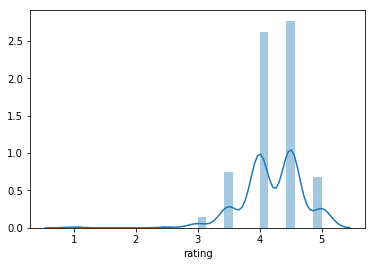

In [7]:
sns.distplot(df['rating'])

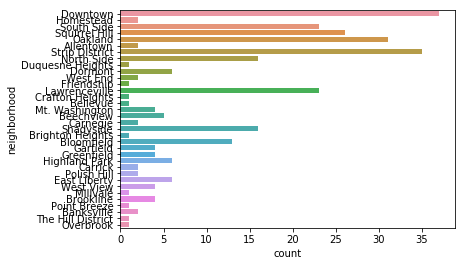

In [8]:
sns.countplot(y = df['neighborhood'])

In [9]:
# BOSTON only
# import ast
# df["cat_list"] = bos_df["categories"].apply(lambda x: ast.literal_eval(x))
# print(bos_df["cat_list"][:10])
# all_cats = []
# for d in bos_df["cat_list"]:
#     all_cats.extend(d)
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 12)
# sns.countplot(y = list(map(lambda x: x[0], all_cats)))

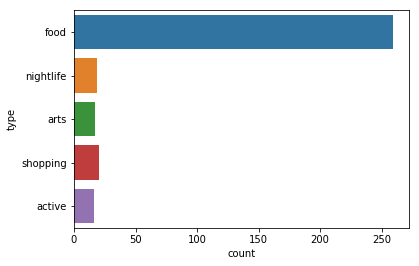

In [10]:
# PITSBURGH only
sns.countplot(y = df['type'])

In [11]:
df['category'].value_counts()

indpak           20
shopping         20
sushi            20
ethnicmarkets    19
nightlife        19
coffee           19
sandwiches       19
pizza            19
mexican          18
arts             17
thai             17
active           16
bakeries         15
italian          15
chinese          14
newamerican      12
vietnamese       11
cafes            10
donuts            9
french            8
japanese          8
restaurants       6
Name: category, dtype: int64

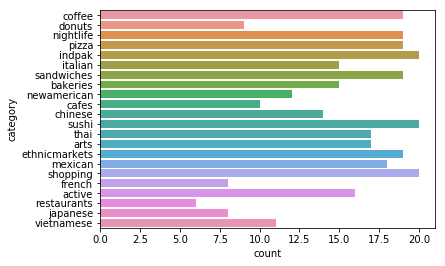

In [12]:
sns.countplot(y = df['category'])

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
categories = df["category"].value_counts()
top_terms = {c: None for c in categories.keys()}

In [15]:
for c in categories.keys():
    vectorizer = CountVectorizer(max_df = .75, max_features = 10, stop_words = 'english')
    vectorizer.fit(df[df["category"] == c]["snippet"])
    top_terms[c] = vectorizer.get_feature_names()

In [16]:
top_terms.keys()

dict_keys(['ethnicmarkets', 'coffee', 'cafes', 'arts', 'sandwiches', 'restaurants', 'french', 'newamerican', 'sushi', 'bakeries', 'thai', 'nightlife', 'japanese', 'shopping', 'active', 'chinese', 'pizza', 'vietnamese', 'donuts', 'mexican', 'indpak', 'italian'])

In [17]:
for key, terms in top_terms.items():
    print(key)
    print("*"*50)
    for term in terms:
        print(term)
    print("="*50)

ethnicmarkets
**************************************************
coffee
grocery
little
pittsburgh
place
restaurant
small
store
taste
thai
coffee
**************************************************
best
coffee
espresso
favorite
friendly
great
little
small
worth
zeke
cafes
**************************************************
brookline
day
downtown
little
macy
man
picked
place
store
time
arts
**************************************************
entrance
fun
going
looking
love
museum
place
shows
ve
years
sandwiches
**************************************************
beef
breakfast
great
ordered
pittsburgh
place
sandwich
small
staff
went
restaurants
**************************************************
10
good
meal
menu
music
nice
night
people
person
ve
french
**************************************************
brunch
crepes
husband
little
love
menu
stopped
time
today
went
newamerican
**************************************************
check
city
decided
delicious
dinner
excellent
food
new
pittsburgh


In [20]:
len(df["neighborhood"].value_counts())

34